# Data Science Hausarbeit

_INF21D - Grundlagen Data Science WS 23/24 - Gruppe 9_  
_Philipp Eichwald, Joshua Luipold, Luis Neumeier_

## Setup

In [1]:
!pip install numpy pandas matplotlib -q


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_pickle('data/merged_data.pkl')
kundendaten = pd.read_pickle('data/kundendaten.pkl')
produktdaten = pd.read_pickle('data/produktdaten.pkl')
transaktionsdaten = pd.read_pickle('data/transaktionsdaten.pkl')

# Fragestellungen

## 1. In welchem Bezirk befindet sich die Buchhandlung?
Unter der Annahme, dass die meisten Kunden in der Nähe der Buchhandlung wohnen, können wir durch die Analyse der Kundenadressen den Bezirk der Buchhandlung herausfinden.

ANTWORT: Die Analyse liegt nahe, dass die **Buchhandlung in Bezirk 4** liegt, da dies in über 63% der Transaktionen der Wohnort der Kunden ist. 

''

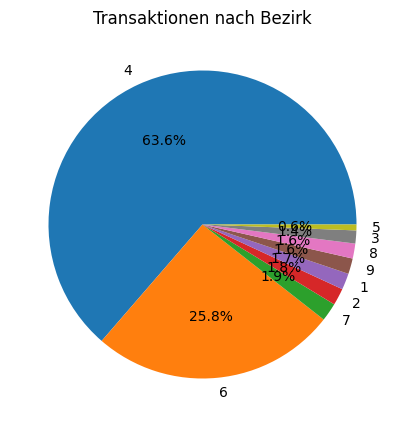

In [4]:
transaktionen_nach_bezirk = data.groupby('Wohnort_Bezirk').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Transaktionen nach Bezirk")
plt.pie(transaktionen_nach_bezirk, labels=transaktionen_nach_bezirk.index, autopct='%1.1f%%')
""

## 2. In welchem Bezirk wohnt die Mehrzahl der Studenten?
Dazu betrachten wir nur die Kunden, die als Beruf "Student" angegeben haben und sortieren sie nach Wohnort.

ANTWORT: Die Analyse zeigt, dass über **88% der Studenten im Bezirk 6** wohnt.

''

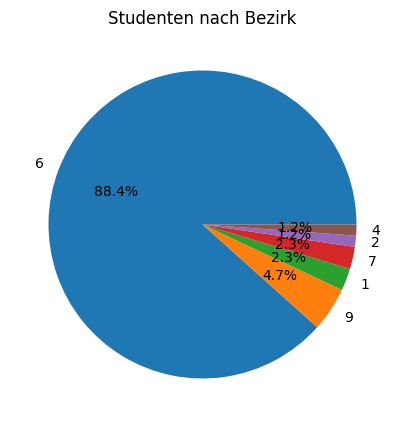

In [5]:
studenten = kundendaten[kundendaten["Beruf"] == "Student"]
studenten_nach_bezirk = studenten.groupby('Wohnort_Bezirk').size().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Studenten nach Bezirk")
plt.pie(studenten_nach_bezirk, labels=studenten_nach_bezirk.index, autopct='%1.1f%%')
""

## 3. Welche Fakultät befindet sich in der Außenstelle der Universität in deinem Viertel?
Dazu können wir die gekauften Bücher der Studenten analysieren.

ANTWORT: Da die Titel der gekauften Bücher überwiegend das Thema Recht aufgreifen, liegt es nahe dass die **Fakultät für Rechtswissenschaft** nahe der Buchhandlung liegt.

In [36]:
titel_an_studenten = data[data['Beruf'] == 'Student']['Titel'].value_counts().sort_values(ascending=False)
titel_an_studenten

Titel
Fiskalstrafrecht                                     98
Grundriss des deutschen Steuerrechts                 60
Die Organschaft im Steuerrecht mit Fallbeispielen    52
Erbrecht für die steuerberatenden Beruf              52
Anwalts- und Steuerberaterhaftung                    49
EStG Kommentare                                      49
Die Selbstanzeige im Steuerstrafverfahren            47
Der Steuerstreit                                     46
Grundlagen des schweizer Steuerrechts                44
Haftung für Steuerschulden                           44
Grundlagen des US-amerikanischen Steuerrechts        41
Erbschafts- und Schenkungssteuer                     40
Das große Umsatzsteuer-Handbuch                      40
Das Steuer-Handbuch                                  39
Name: count, dtype: int64

## 4. Clustere die verkauften Bücher für die Analyse sinnvoll in Genres
Dazu können wir die Buchtitel analysieren und die Bücher in Genres clustern. Für das Clustering wurde GPT4 verwendet.

In [7]:
unique_titel = produktdaten["Titel"].unique().tolist()
print(f"Anzahl einzigartiger Titel: {len(unique_titel)}")
# unique_titel

Anzahl einzigartiger Titel: 174


In [8]:
titel_clustering = {  
    "Kinderbuch": ['Das Minecraft Malbuch', 'Der beste Karlsson der Welt', 'Der Kinder Weltatlas', 'Die drei ??? Und das Gespensterschloss', 'Die drei ??? Und der Fluch des Rubins', 'Die drei ??? Und der seltsame Wecker', 'Die drei ??? Und der sprechende Papagei', 'Die drei ??? Und der tanzende Teufel', 'Fünf Freunde erforschen die Schatzinsel', 'Hanni und Nanni', 'Immer lustig in Bullerbü', 'Karlsson fliegt wieder', 'Karlsson vom Dach', 'Lustiges Bullerbü', 'Mehr von uns Kindern in Bullerbü', 'Pipi geht an Bord', 'Pipi in Taka-Tuka-Land', 'Pipi Langstrumpf', 'TKKG Junior: Detektive auf Tauchstation', 'TKKG Junior: Giftige Schokolade', 'TKKG Junior: Trügerischer Paddelspaß', 'Tobi Erstlesebuch', 'Weihnachten in Bullerbü', 'Wir Kinder aus Bullerbü'],  
    "Lehrbuch": ['Das Sprach-Lese-Buch 1', 'Das Sprach-Lese-Buch 2', 'Das Sprach-Lese-Buch 3', 'Das Sprach-Lese-Buch 4', 'ABC der Tiere 2. Sprachbuch', 'ABC der Tiere 3. Sprachbuch', 'ABC der Tiere 4. Sprachbuch', 'ABC der Tiere. Die Silbenfibel', 'ABC der Tiere. Grundstufe', 'Deutsch mit Olli 1 - Fibel -', 'Deutsch mit Olli 3 - Sprachbuch -', 'eins zwei drei. Mathematik 1', 'eins zwei drei. Mathematik 2', 'eins zwei drei. Mathematik 3', 'eins zwei drei. Mathematik 4', 'Elektrotechnik 1. Lehrjahr', 'Elektrotechnik 3. Lehrjahr', 'Englisch Mittelstufe 10', 'Englisch Mittelstufe 8', 'Englisch Mittelstufe 9', 'Französisch Mittelstufe 10', 'Französisch Mittelstufe 8', 'Französisch Mittelstufe 9', 'Geschichte Mittelstufe 10', 'Geschichte Mittelstufe 8', 'Geschichte Mittelstufe 9', 'Mathematik Mittelstufe 10', 'Mathematik Mittelstufe 8', 'Mathematik Mittelstufe 9', 'Mathematik Oberstufe', 'Religion Mittelstufe 10', 'Religion Mittelstufe 8', 'Religion Mittelstufe 9', 'Sozialkunde Oberstufe', 'Zahlenzauber 1', 'Zahlenzauber 2', 'Zahlenzauber 3', 'Zahlenzauber 4', 'Jo-Jo. Mathematik 1', 'Jo-Jo. Mathematik 2', 'Jo-Jo. Mathematik 3', 'Jo-Jo. Mathematik 4', 'Biologie Mittelstufe 10', 'Biologie Mittelstufe 8', 'Biologie Mittelstufe 9', 'Chemie Mittelstufe 10', 'Chemie Mittelstufe 8', 'Chemie Mittelstufe 9', 'Bildende Kunst Mittelstufe 10', 'Bildende Kunst Mittelstufe 8', 'Bildende Kunst Mittelstufe 9', 'PASSWORT LUPE Fibel Klasse 1', 'PASSWORT LUPE Fibel Klasse 2', 'PASSWORT LUPE Fibel Klasse 3', 'PASSWORT LUPE Fibel Klasse 4', 'Flex und Flora Lernpaket 1', 'Flex und Flora Lernpaket 2', 'Flex und Flora Lernpaket 3', 'Flex und Flora Lernpaket 4'],  
    "Kriminalroman": ['Milchgeld, Kommissar Kluftinger ermittelt','Milde Gaben: Commissario Brunettis einunddreißigster Fall','Achtsam Morden', 'Affenhitze, Kommissar Kluftinger ermittelt', 'Böser Wolf', 'Das Gesetz der Lagune: Commissario Brunettis zehnter Fall', 'Das goldene Ei: Commissario Brunettis zweiundzwanzigster Fall', 'Der Donnerstags Mord Club', 'Der Mann der lächelte', 'Der Sohn: Kriminalroman', 'Die falsche Fährte', 'Die fünfte Frau', 'Die Lebenden und die Toten', 'Die Morde von Corwie Castle', 'Die unbekannte Tote', 'DieBrandmauer', 'Erbarmen', 'Erlösung', 'Erntedank, Kommissar Kluftinger ermittelt', 'Fährte: Ein neuer Fall für Kommissar Harry Hole ? Der internationale Krimi-Bestseller aus Norwegen', 'Flüchtiges Begehren: Commissario Brunettis dreißigster Fall', 'Funkenmord, Kommissar Kluftinger ermittelt', 'Geheime Quellen: Commissario Brunettis neunundzwanzigster Fall', 'Grimmbart, Kommissar Kluftinger ermittelt', 'Haus der Mörder', 'Herzblut, Kommissar Kluftinger ermittelt', 'Himmelhorn, Kommissar Kluftinger ermittelt', 'Hunde von Riga', 'Kommissar Kluftinger ermittelt', 'Laienspiel, Kommissar Kluftinger ermittelt', 'Mittsommermord', 'Mord am Strandweg', 'Mord auf der großen Freiheit', 'Mord im Orientexpress', 'Mord im Watt', 'Mörder ohne Gesicht', 'Mörderische Kreuzfahrt', 'Mörderische Schären', 'Opfer 2117', 'Opferbucht', 'Rattentod', 'Rauhnacht, Kommissar Kluftinger ermittelt', 'Rotkehlchen: Ein Fall für Harry Hole (Ein Harry-Hole-Krimi, Band 3)', 'Schneewitchen muss sterben', 'Seegrund, Kommissar Kluftinger ermittelt', 'Sherlock Holmes Bd. 1: Eine Studie in Scharlachrot / Das Zeichen der Vier (Schmuckausgabe)', 'Sherlock Holmes Bd. 2: Die Abenteuer (Schmuckausgabe)', 'Sherlock Holmes Bd. 4: Der Hund der Baskervilles (Kleine Schmuckausgabe)', 'Strandgrab', 'Tiefe Wunden', 'Unter Haien', 'Venezianisches Finale: Commissario Brunettis erster Fall', 'Wie die Saat, so die Ernte: Commissario Brunettis zweiunddreißigster Fall'],  
    "Sachbuch": ['1000 spannende Fussballfakten', 'Anwalts- und Steuerberaterhaftung', 'Das große Umsatzsteuer-Handbuch', 'Das große WM-Buch 2022', 'Das Steuer-Handbuch', 'Der Steuerstreit', 'Die Fitness-Bibel', 'Die Organschaft im Steuerrecht mit Fallbeispielen', 'Die Selbstanzeige im Steuerstrafverfahren', 'EStG Kommentare', 'Erbrecht für die steuerberatenden Beruf', 'Erbschafts- und Schenkungssteuer', 'Fiskalstrafrecht', 'Grundlagen des schweizer Steuerrechts', 'Grundlagen des US-amerikanischen Steuerrechts', 'Grundriss des deutschen Steuerrechts', 'Haftung für Steuerschulden', 'Sport und Ernährung', 'Was Ist Was - Das alte Agypten', 'Was Ist Was - Planeten', 'Was Ist Was - Versunkene Schätze', 'Yoga'],  
    "Reisebuch": ['Atlas der Reiselust Frankreich', 'Bildband Belgien', 'Bildband Dänemark', 'Bildband Italien', 'Bildband Portugal', 'Bildband Spanien', 'Legendäre Urlaubsorte in Italien', 'Lindau - Bildband & Inselführer', 'Lonely Planet Bildband Legendäre Radtouren in Deutschland', 'Lonely Planet Bildband Legendäre Radtouren in Europa'],  
    "Kochbuch": ['Familienrezepte', 'Jamie kocht Italien', 'Kreative Weihnachtsrezepte','Basic Baking', 'Basic Cooking','One Pot Gerichte']  
}

In [9]:
produktdaten["Genre"] = None

for i, row in produktdaten.iterrows():
    for category, titles in titel_clustering.items():
        if row["Titel"] in titles:
            produktdaten.loc[i,"Genre"] = category
            continue
produktdaten.head()

,Buch_ID,Titel,Autor,Preis,Buch_typ,Genre
0,205,Das Sprach-Lese-Buch 1,Klaus Diedrichs,25.0,hard cover,Lehrbuch
1,206,Das Sprach-Lese-Buch 2,Klaus Diedrichs,24.0,hard cover,Lehrbuch
2,207,Das Sprach-Lese-Buch 3,Klaus Diedrichs,22.0,hard cover,Lehrbuch
3,208,Das Sprach-Lese-Buch 4,Klaus Diedrichs,24.0,hard cover,Lehrbuch
4,132,1000 spannende Fussballfakten,Daniel Kicker,22.0,hard cover,Sachbuch


In [10]:
# diese information wird auch in merged_daten eingefügt
data["Genre"] = None
for i, row in data.iterrows():
    for category, titles in titel_clustering.items():
        if row["Titel"] in titles:
            data.loc[i,"Genre"] = category
            continue
data.head()

,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Titel,Autor,Preis,Buch_typ,Genre
0,2023-01-12,23393,179,spontan,Thomas Schmitt,4,Rentner,männlich,konfessionslos,72,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman
1,2023-03-25,23311,179,spontan,Gudrun Wagner,4,Pensionär,weiblich,muslimisch,68,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman
2,2023-02-28,23327,179,spontan,Christiane Maier,8,Pensionär,weiblich,evangelisch,70,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman
3,2023-05-11,23331,179,spontan,Fritz Yilmaz,4,Großeltern,männlich,katholisch,79,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman
4,2023-11-11,23372,179,spontan,Michael Schmid,4,Großeltern,männlich,katholisch,74,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman


''

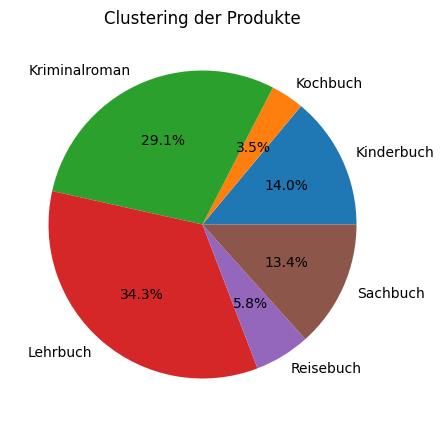

In [11]:
plt.figure(figsize=(10,5))
plt.title("Clustering der Produkte")
plt.pie(produktdaten.groupby("Genre").size(), labels=produktdaten.groupby("Genre").size().index, autopct='%1.1f%%')
""

## Aufgabe 5: Clustere die Berufe sinnvoll in Berufsgruppen
Hierzu werden die vorverarbeiteten Daten in drei Kategorien unterteilt: Kind, Angestellt, Arbeitslos, Rentner

In [12]:
unique_berufe = kundendaten["Beruf"].unique().tolist()
print(f"Anzahl einzigartiger Titel: {len(unique_berufe)}")


Anzahl einzigartiger Titel: 24


In [13]:
beruf_clustering = {
    "Bildung und Forschung": ["Student", "Doktorand"],
    "Hauswirtschaft": ["Hausmann", "Eltern", "Großeltern"],
    "Ruhestand": ["Frührentner", "Pensionär", "Rentner", "Ruheständler", "nicht mehr berufstätig", "Vorruheständler"],
    "Handwerk und Technik": ["Elektroniker", "Bäcker", "Chemiker", "Klemptner", "IT-Fachmann", "Metzger"],
    "Recht und Verwaltung": ["Rechtsanwalt", "Richter", "Steuerberater", "Betriebswirt", "Bankkaufmann"],
    "Naturwissenschaften und Gesundheit": ["Biologe", "Biologin", "Altenpfleger"]
}

In [14]:
kundendaten["Berufsgruppe"] = None

for i, row in kundendaten.iterrows():
    for category, professions in beruf_clustering.items():
        if row["Beruf"] in professions:
            kundendaten.loc[i,"Berufsgruppe"] = category
            continue
kundendaten.head()

,Kunde_Nr,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Berufsgruppe
0,23200,Thomas Huber,6,Student,männlich,evangelisch,25,Bildung und Forschung
1,23201,Michaela Schmidt,1,Student,weiblich,evangelisch,26,Bildung und Forschung
2,23202,Lena Ebert,6,Student,weiblich,katholisch,23,Bildung und Forschung
3,23203,Kurt Funkel,6,Student,männlich,katholisch,21,Bildung und Forschung
4,23204,Eva Jäger,7,Student,weiblich,konfessionslos,22,Bildung und Forschung


In [15]:
# diese information wird auch in merged_daten eingefügt
data["Berufsgruppe"] = None
for i, row in data.iterrows():
    for category, professions in beruf_clustering.items():
        if row["Beruf"] in professions:
            data.loc[i,"Berufsgruppe"] = category
            continue
data.head()

,Kauf_Datum,Kunden_Nr,Buch_ID,Kauf_Typ,Kunde_Name,Wohnort_Bezirk,Beruf,Geschlecht,Religionszugehörigkeit,Alter,Titel,Autor,Preis,Buch_typ,Genre,Berufsgruppe
0,2023-01-12,23393,179,spontan,Thomas Schmitt,4,Rentner,männlich,konfessionslos,72,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman,Ruhestand
1,2023-03-25,23311,179,spontan,Gudrun Wagner,4,Pensionär,weiblich,muslimisch,68,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman,Ruhestand
2,2023-02-28,23327,179,spontan,Christiane Maier,8,Pensionär,weiblich,evangelisch,70,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman,Ruhestand
3,2023-05-11,23331,179,spontan,Fritz Yilmaz,4,Großeltern,männlich,katholisch,79,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman,Hauswirtschaft
4,2023-11-11,23372,179,spontan,Michael Schmid,4,Großeltern,männlich,katholisch,74,Mittsommermord,Henning Mankell,21.0,paperback,Kriminalroman,Hauswirtschaft


''

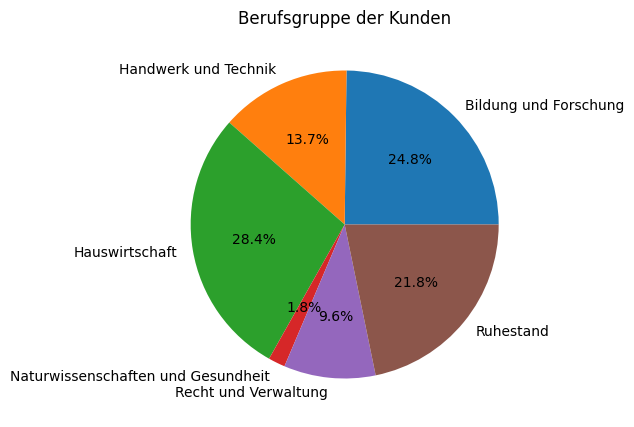

In [16]:
plt.figure(figsize=(10,5))
plt.title("Berufsgruppe der Kunden")
plt.pie(kundendaten.groupby("Berufsgruppe").size(), labels=kundendaten.groupby("Berufsgruppe").size().index, autopct='%1.1f%%')
""

## Aufgabe 6: Erstelle Kundenprofile
Welche sind die drei wichtigsten Kundenprofile für den 
Bücherabsatz in deinem Ladengeschäft? Charakterisiere die Kundenprofile.

Dazu werden zunächst die Zusammenhänge von Berufsgruppen und Genre analysiert, bevor das Kauffverhalten (spontan vs. vorbestellt) nach Gruppen untersucht wird.

''

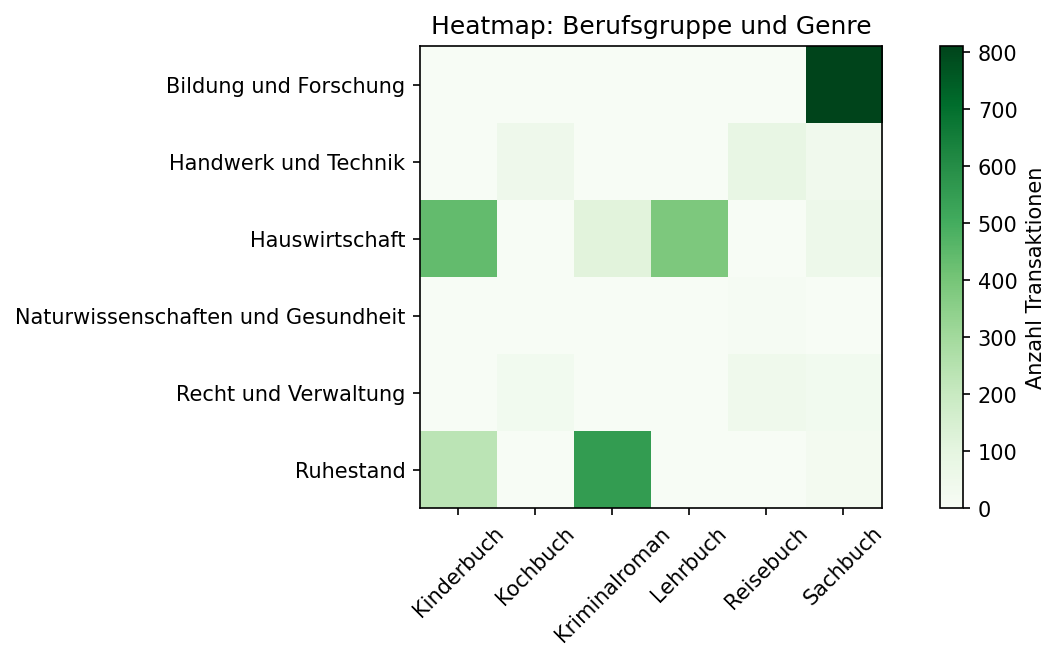

In [17]:
berufsgruppe_genre = pd.crosstab(data["Berufsgruppe"], data["Genre"])

plt.figure(figsize=(10,4), dpi=150)
plt.imshow(berufsgruppe_genre, cmap='Greens')

plt.title('Heatmap: Berufsgruppe und Genre')
plt.colorbar(label='Anzahl Transaktionen')
plt.xticks(np.arange(len(berufsgruppe_genre.columns)), berufsgruppe_genre.columns, rotation=45)
plt.yticks(np.arange(len(berufsgruppe_genre.index)), berufsgruppe_genre.index)
""

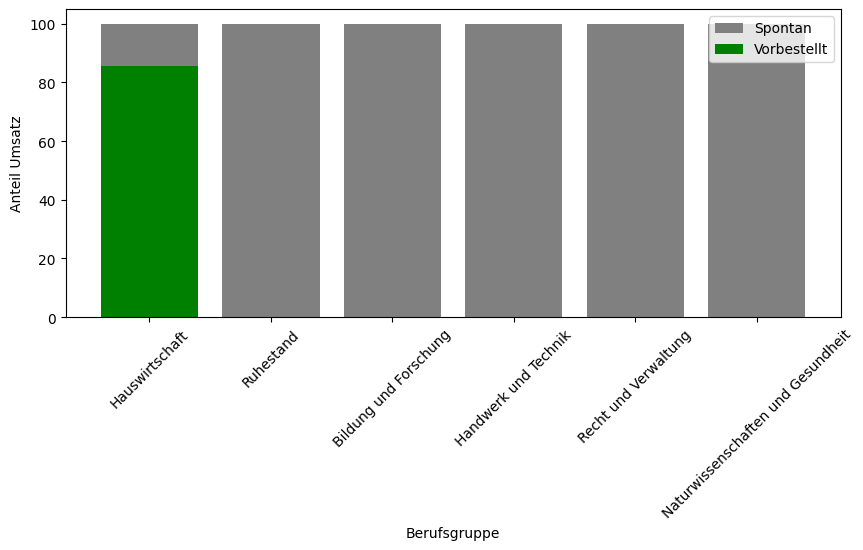

In [18]:
fig, ax = plt.subplots(figsize=(10,4))

for idx, berufsgruppe in enumerate(data["Berufsgruppe"].value_counts().index):
    berufsgruppe_data = data[data["Berufsgruppe"] == berufsgruppe]
    
    spontan = berufsgruppe_data[berufsgruppe_data["Kauf_Typ"] == "spontan"]["Preis"].sum()
    vorbestellt = berufsgruppe_data[berufsgruppe_data["Kauf_Typ"] == "vorbestellt"]["Preis"].sum()
    
    total = spontan + vorbestellt
    spontan = spontan / total * 100
    vorbestellt = vorbestellt / total * 100
    
    ax.bar(idx, spontan + vorbestellt, color="gray", label="Spontan")
    ax.bar(idx, vorbestellt, color="green", label="Vorbestellt")
    
ax.set_xticks(range(len(data["Berufsgruppe"].value_counts().index)))
ax.set_xticklabels(data["Berufsgruppe"].value_counts().index, rotation=45)
ax.set_ylabel('Anteil Umsatz')
ax.set_xlabel('Berufsgruppe')
ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])
    

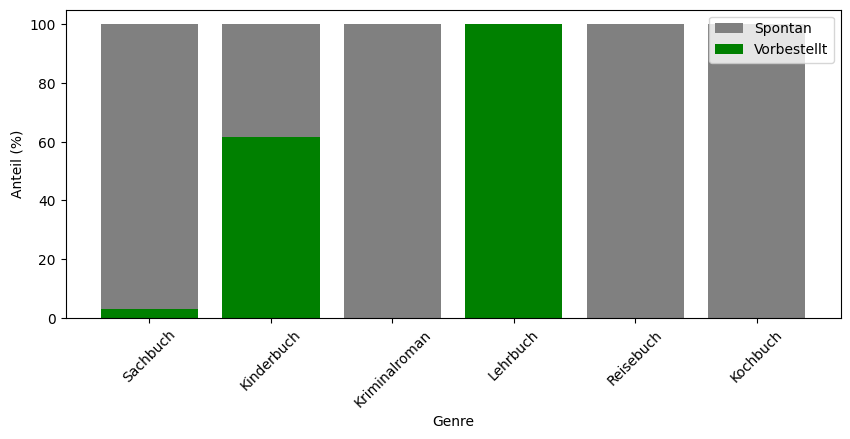

In [19]:
fig, ax = plt.subplots(figsize=(10,4))

for idx, berufsgruppe in enumerate(data["Genre"].value_counts().index):
    berufsgruppe_data = data[data["Genre"] == berufsgruppe]

    spontan = berufsgruppe_data[berufsgruppe_data["Kauf_Typ"] == "spontan"]["Preis"].sum()
    vorbestellt = berufsgruppe_data[berufsgruppe_data["Kauf_Typ"] == "vorbestellt"]["Preis"].sum()

    total = spontan + vorbestellt
    spontan = spontan / total * 100
    vorbestellt = vorbestellt / total * 100

    ax.bar(idx, spontan + vorbestellt, color="gray", label="Spontan")
    ax.bar(idx, vorbestellt, color="green", label="Vorbestellt")

ax.set_xticks(range(len(data["Genre"].value_counts().index)))
ax.set_xticklabels(data["Genre"].value_counts().index, rotation=45)
ax.set_ylabel('Anteil (%)')
ax.set_xlabel('Genre')
ax.legend()
# only display 2 entries in the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2])

ANTWORT: Die Analyse lässt die Charakterisierung von drei Kundenprofilen zu.

### "Der Lehrling"
- Doktorant oder Student
- Kauft hauptsächlich Sachbücher
- Kauft hauptsächlich spontan

### "Der Fürsorgliche"
- Elternteil oder Großelternteil
- Kauft gerne Kinder- oder Lehrbücher
- Bestellt hauptsächlich vor

### "Der Gelangweilte"
- Rentner, Pensionär oder Arbeitslos
- Kauft gerne Kriminalromane, vereinzelt auch Kinderbücher
- Kauft hauptsächlich spontan

## Aufgabe 7: Erstelle eine Umsatzanalyse für 2023 auf Monatsbasis
Was sind die Schwerpunktmonate?

Dazu wird der Umsatz je Monat nach Genre und nach Berufsgruppe visualisiert.

ANTWORT: Die Visualisierungen zeigen, dass die Monate **April, September, Oktober und Dezember die umsatzstärksten sind**. Dabei werden im April und Oktober hauptsächlich Sachbücher von Studenten gekauft (Semesterstarts), während im September die Eltern Lehrbücher kaufen. Im Dezember werden vermehrt  Kinderbücher gekauft, vermutlich als Weihnachtsgeschenk.

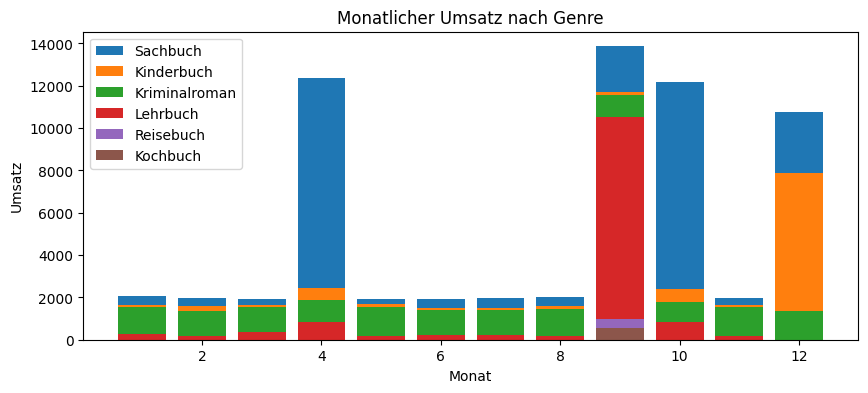

In [20]:
fig, ax = plt.subplots(figsize=(10,4))

data["Monat"] = data["Kauf_Datum"].dt.month
genres = data["Genre"].value_counts().index

below = data.groupby("Monat")["Preis"].sum()

for genre in genres:
    genre_data = data[data["Genre"] == genre]
    genre_data = genre_data.groupby("Monat")["Preis"].sum()

    genre_copy = genre_data.copy()
    ax.bar(below.index, below.values, label=genre)
    below -= genre_copy

ax.set_title("Monatlicher Umsatz nach Genre")
ax.set_ylabel('Umsatz')
ax.set_xlabel('Monat')
ax.legend()

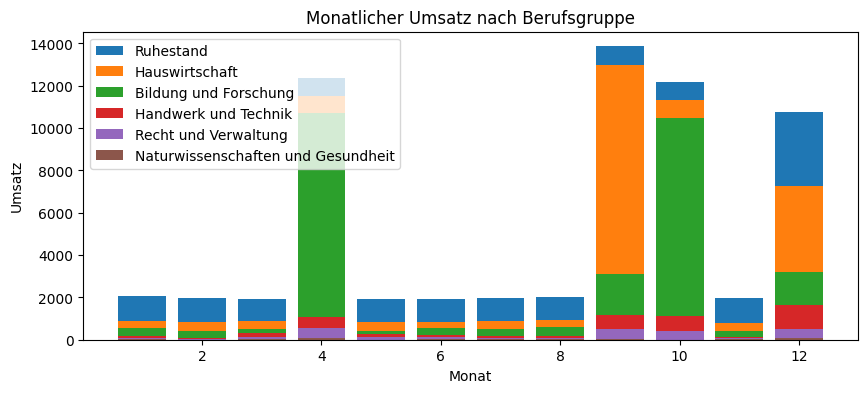

In [21]:
fig, ax = plt.subplots(figsize=(10,4))

data["Monat"] = data["Kauf_Datum"].dt.month

below = data.groupby("Monat")["Preis"].sum()

for berufsgruppe in data["Berufsgruppe"].unique():
    berufsgruppe_data = data[data["Berufsgruppe"] == berufsgruppe]
    berufsgruppe_data = berufsgruppe_data.groupby("Monat")["Preis"].sum()

    ax.bar(below.index, below.values, label=berufsgruppe)
    below -= berufsgruppe_data

ax.set_title("Monatlicher Umsatz nach Berufsgruppe")
ax.set_ylabel('Umsatz')
ax.set_xlabel('Monat')
ax.legend()

## Aufgabe 8: Analysiere die Nichtschwerpunktmonate und die Schwerpunktmonate
Welche Kundenprofile kaufen wann was?

Da die Visualisierung einer dreidimensionalen Beziehung schwierig ist, wird jeweils die Relation zwischen zwei Dimensionen visualisiert.
- Wer kauft was? (Berufsgruppe zu Genre)
- Wer kauft wann? (Berufsgruppe zu Monat)
- Was wird wann gekauft? (Genre zu Monat)

''

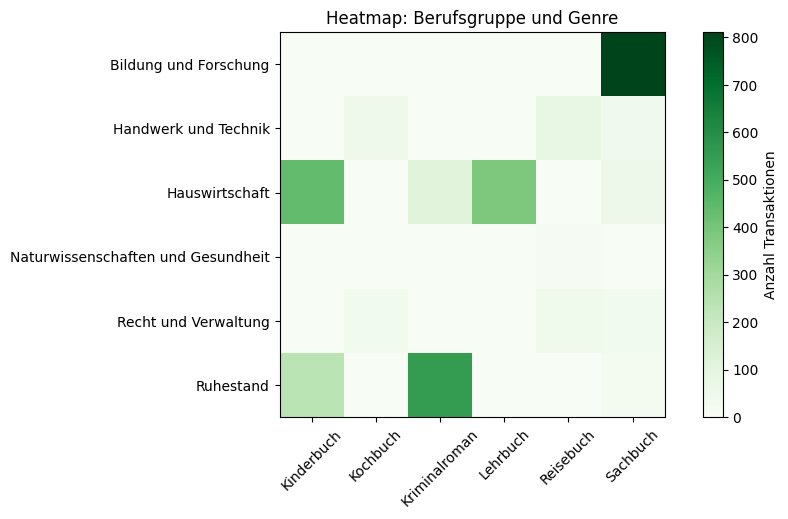

In [22]:
berufsgruppe_zu_genre = pd.crosstab(data['Berufsgruppe'], data['Genre'])

plt.figure(figsize=(10,5))
plt.imshow(berufsgruppe_zu_genre, cmap='Greens')

plt.title('Heatmap: Berufsgruppe und Genre')
plt.colorbar(label='Anzahl Transaktionen')
plt.xticks(np.arange(len(berufsgruppe_zu_genre.columns)), berufsgruppe_zu_genre.columns, rotation=45)
plt.yticks(np.arange(len(berufsgruppe_zu_genre.index)), berufsgruppe_zu_genre.index)
""

Hier ist direkt ersichtlich, dass Kinder (inklusive Schlüler, Studenten etc.) hauptsählich Sachbücher erwerben. Rentner hingegen schmökern gerne in Kriminalromanen, während Arbeitslose gerne Kinderbücher oder Lehrbücher kaufen.

''

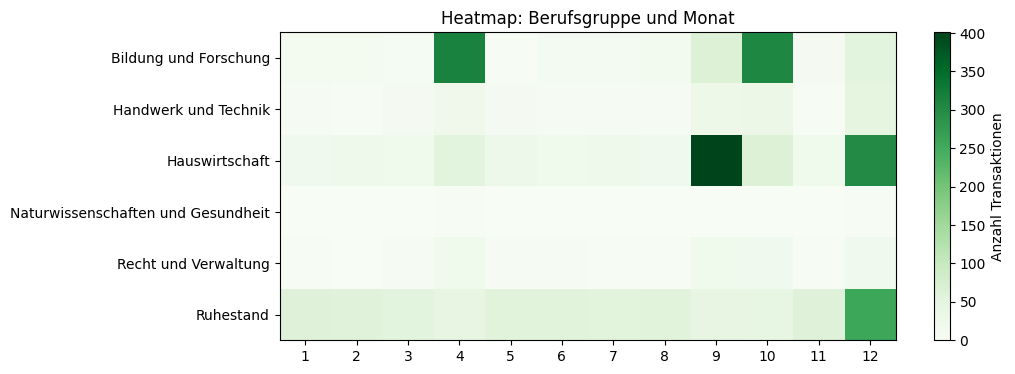

In [23]:
berufsgruppe_zu_monat = pd.crosstab(data['Berufsgruppe'], data['Monat'])

plt.figure(figsize=(10,4))
plt.imshow(berufsgruppe_zu_monat, cmap='Greens')

plt.title('Heatmap: Berufsgruppe und Monat')
plt.colorbar(label='Anzahl Transaktionen')
plt.xticks(np.arange(len(berufsgruppe_zu_monat.columns)), berufsgruppe_zu_monat.columns)
plt.yticks(np.arange(len(berufsgruppe_zu_monat.index)), berufsgruppe_zu_monat.index)
""

Hier ist eine deutliche Periodizität erkennbar, da Kinder meist im 4. und im 10. Monat kaufen (Start der Semester). Rentner und Arbeitslose kaufen oft im Dezember, dies wäre durch Weihnachtsgeschenke zu erklären. Rentner sind dabei die einzige Gruppe, die im ganzen Jahr viel kauft. Unerklärt bleibt der Peak von Hauswirtschaftlern im 09. Monat. Dies wird in einer weiteren Grafik genauer untersucht.

''

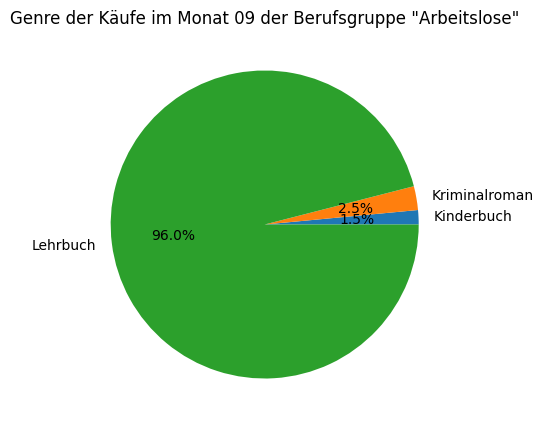

In [24]:
special_einträge = data[(data["Monat"] == 9) & (data["Berufsgruppe"] == "Hauswirtschaft")]
plt.figure(figsize=(10,5))
plt.title("Genre der Käufe im Monat 09 der Berufsgruppe \"Arbeitslose\"")
plt.pie(special_einträge.groupby("Genre").size(), labels=special_einträge.groupby("Genre").size().index, autopct='%1.1f%%')
""

Hier werden also hauptsächlich Lehrbücher gekauft, vermutlich zur Vorbereitung auf das anstehende Semester

''

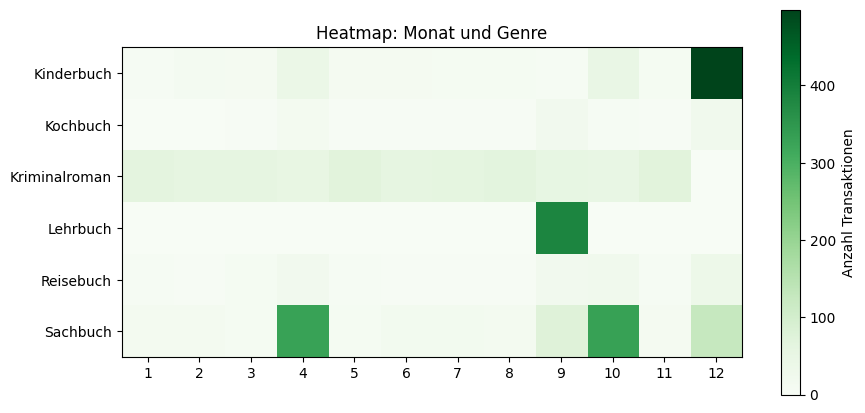

In [25]:
genre_zu_monat = pd.crosstab(data['Genre'], data['Monat'])

plt.figure(figsize=(10,5))
plt.imshow(genre_zu_monat, cmap='Greens')

plt.title('Heatmap: Monat und Genre')
plt.colorbar(label='Anzahl Transaktionen')
plt.xticks(np.arange(len(genre_zu_monat.columns)), genre_zu_monat.columns)
plt.yticks(np.arange(len(genre_zu_monat.index)), genre_zu_monat.index)
""

Hier wird ersichtlich, dass im Dezember vermehrt Kinderbücher gekauft werden (das unterstreicht die Hypothese der Weihnachtsgeschenke). Ebenfalls sind die Peaks im Kauf von Sachbüchern in Monat 04 und 10 erkennbar. Der Kauf von Lehrbüchern im Monat 09 ist ebenfalls ersichtlich. Interessant ist auch, dass der Verkauf von Kriminalromanen das ganze Jahr über gut läuft.

''

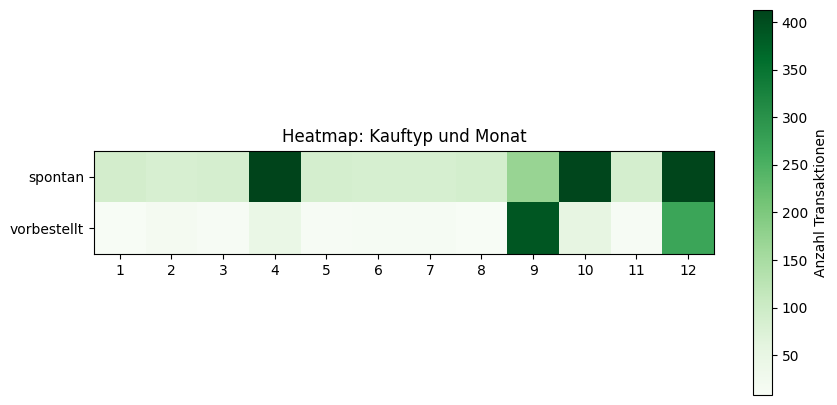

In [37]:
kauftyp_zu_monat = pd.crosstab(data['Kauf_Typ'], data['Monat'])

plt.figure(figsize=(10,5))
plt.imshow(kauftyp_zu_monat, cmap='Greens')

plt.title('Heatmap: Kauftyp und Monat')
plt.colorbar(label='Anzahl Transaktionen')
plt.xticks(np.arange(len(kauftyp_zu_monat.columns)), kauftyp_zu_monat.columns)
plt.yticks(np.arange(len(kauftyp_zu_monat.index)), kauftyp_zu_monat.index)
""

Aus dieser Grafik kann man ableiten, dass eigentlich nur in Monat 09 und Monat 12 Vorbestellungen einen relevanten Teil der Transaktionen darstellen. Dies bedeutet auch, dass viele Kunden in Monat 09 ihre Bücher nicht spontan kaufen.

## Aufgabe 9: Welche Bücher ins Schaufenster?
Wir nehmen an, dass das Ausstellen von Büchern mit dem maximalen Umsatz im jeweiligen Monat am sinnvollsten ist. Daher suchen wir für jeden Monat die zehn umsatzstärksten Bücher und stellen diese aus.

ANTWORT: Die exakten Titel sind der Tabelle unten zu entnehmen. Auffällig ist hierbei wieder das **Angebot an Kinderbüchern im Dezember**, sowie der **Verkauf von Sachbüchern in den Monaten April und Oktober**.

In [55]:
data_grouped = data.drop(columns=["Kauf_Datum"]).groupby(by=["Monat", "Titel"]).aggregate({"Kauf_Typ":"count","Preis":"sum"}).reset_index(drop=False).sort_values(by="Preis", ascending=False)
data_grouped.rename(columns={"Kauf_Typ":"Anzahl_Verkäufe", "Preis":"Umsatz"}, inplace=True)
data_grouped = data_grouped[["Monat", "Titel", "Umsatz","Anzahl_Verkäufe"]]
data_grouped = data_grouped.groupby("Monat").head(3).reset_index(drop=True)
data_grouped = data_grouped.sort_values(by=["Monat", "Umsatz"], ascending=[True,False]).reset_index(drop=True)
data_grouped

,Monat,Titel,Umsatz,Anzahl_Verkäufe
0,1,Grundlagen des schweizer Steuerrechts,132.0,4
1,1,Rattentod,76.0,4
2,1,Fährte: Ein neuer Fall für Kommissar Harry Hol...,66.0,3
3,2,EStG Kommentare,108.0,4
4,2,Opfer 2117,84.0,4
5,2,Die Organschaft im Steuerrecht mit Fallbeispielen,74.0,2
6,3,Lindau - Bildband & Inselführer,96.0,4
7,3,Mord auf der großen Freiheit,95.0,5
8,3,Sherlock Holmes Bd. 1: Eine Studie in Scharlac...,72.0,3
9,4,Fiskalstrafrecht,1527.0,48


C:\Users\luisb\AppData\Local\Temp\ipykernel_19056\3930001166.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.bar(data_grouped["ID"], data_grouped["Umsatz"], color=[plt.cm.get_cmap('tab10')(int(i/3)%10) for i in range(len(data_grouped))])
) missing from current font.ng\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


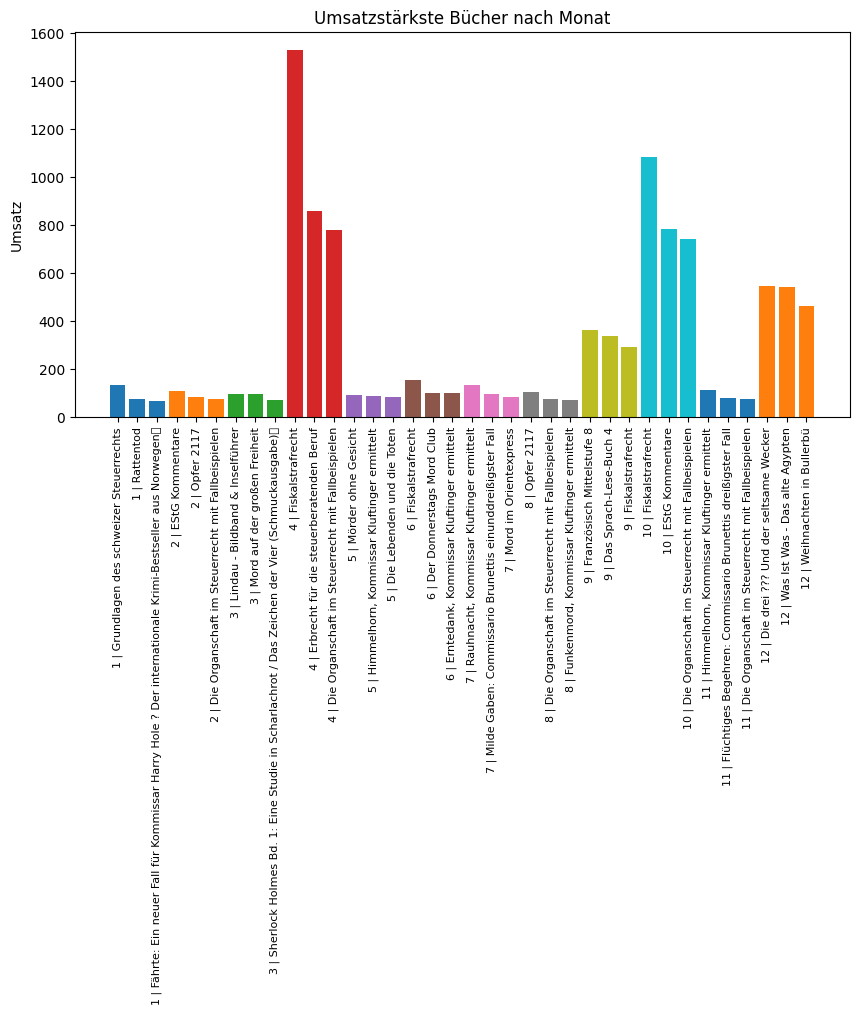

In [100]:
plt.figure(figsize=(10,5))
plt.title("Umsatzstärkste Bücher nach Monat")
data_grouped["ID"] = data_grouped["Monat"].astype(str) + " | " + data_grouped["Titel"]
# plt.bar(data_grouped["Titel"], data_grouped["Umsatz"])
plt.bar(data_grouped["ID"], data_grouped["Umsatz"], color=[plt.cm.get_cmap('tab10')(int(i/3)%10) for i in range(len(data_grouped))])
plt.xticks(rotation=90, size=8)
plt.ylabel("Umsatz")
plt.show()

Unter Berücksichtigung des Faktes, dass die meisten Verkäufe in Monat 9 jedoch aus Vorbestellungen entstehen, ist das Ausstellen dieser Bücher vermutlich nicht so gewinnbringend wie unter anderen Umständen. Da es in diesem Monat aber keine anderen Genres mit hohen Verkaufszahlen gibt, wird an dieser Option festgehalten. 

## Aufgabe 10: Welche Bücher in die Ladenecke?
Da die Ecke klein ist und die Vorfinanzierung des Buchbestandes Geld kostet, sollten hier nur Bücher ausgestellt werden die auch tatsächlich gekauft werden.
Außerdem sollte sichergestellt werden, dass die Nachfrage immer ausreichend gedeckt ist, um keinen Umsatz entgehen zu lassen.

Die Antwort auf diese Aufgabe ist eng mit Aufgabe 09 verknüpft und kann auf die gleichen Informationen zurückgreifen. In die Ladenecke sollten aber nur Bücher, die sich garantiert verkaufen. Dafür kann ein dynamischer Schwellenwert eingeführt werden, der entweder eine minimale Anzahl an Verkäufen vorgibt (z.B. 50 Verkäufe pro Jahr) oder ein Perzentil der am besten verkauften Bücher wiederspiegelt (z.B. Top 5%).

ANTWORT: Je nach Festlegung des Schwellenwerts werden unterschiedlich viele Bücher ausgestellt. Bei Wahl der Top 5% sind es 9 Bücher, die alle Verkaufszahlen von über 50 Stück pro Jahr ausweisen. Je nach Risikobereitschaft sollte die initiale Beschaffung sich an den Verkaufszahlen des letzten Jahres orientieren.

In [112]:
data_grouped = data.drop(columns=["Kauf_Datum"]).groupby(by=["Titel"]).aggregate({"Preis": "sum", "Kauf_Typ": "count"}).reset_index(drop=False)
data_grouped.rename(columns={"Kauf_Typ":"Anzahl_Verkäufe", "Preis":"Umsatz"}, inplace=True)
data_grouped.sort_values(by="Anzahl_Verkäufe", ascending=False, inplace=True)
data_grouped

,Titel,Umsatz,Anzahl_Verkäufe
71,Fiskalstrafrecht,3374.0,106
90,Grundriss des deutschen Steuerrechts,2059.0,71
66,Erbrecht für die steuerberatenden Beruf,2013.0,61
59,EStG Kommentare,1620.0,60
8,Anwalts- und Steuerberaterhaftung,1375.0,55
...,...,...,...
29,Das Sprach-Lese-Buch 1,75.0,3
168,Zahlenzauber 3,75.0,3
64,Englisch Mittelstufe 9,60.0,3
21,Biologie Mittelstufe 8,78.0,3


In [143]:
treshold = 5 # 5% der best-verkauften Bücher werden ausgestellt
lower_limit = data_grouped.iloc[int(len(data_grouped) * treshold*0.01),2]
shown_books = data_grouped[data_grouped["Anzahl_Verkäufe"] >= (0.9*lower_limit)]
ausgestellt = shown_books["Anzahl_Verkäufe"] >= lower_limit
lower_limit


53

''

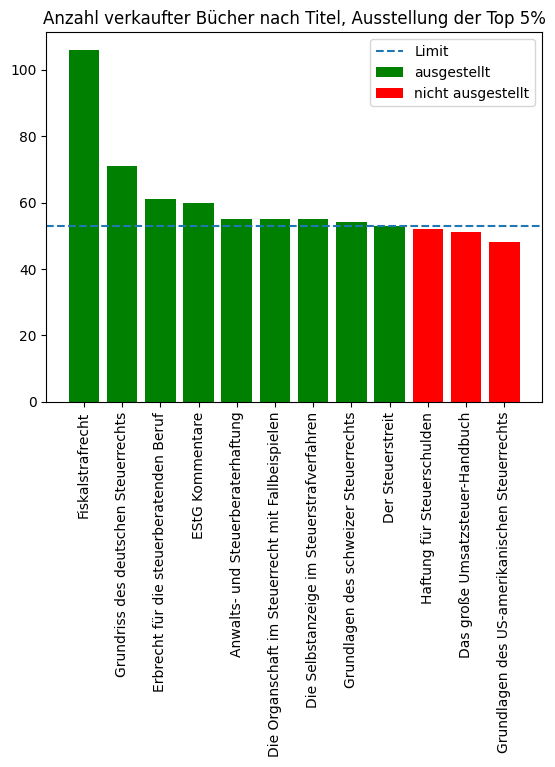

In [142]:
plt.bar(shown_books[ausgestellt]["Titel"],shown_books[ausgestellt]["Anzahl_Verkäufe"], color="green", label="ausgestellt")
plt.bar(shown_books[~ausgestellt]["Titel"],shown_books[~ausgestellt]["Anzahl_Verkäufe"], color="red", label="nicht ausgestellt")
plt.title(f"Anzahl verkaufter Bücher nach Titel, Ausstellung der Top {treshold}%")
plt.xticks(rotation=90)
plt.axhline(lower_limit, label="Limit",linestyle="--")
plt.legend()

""